<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛР 3, вариант 10 


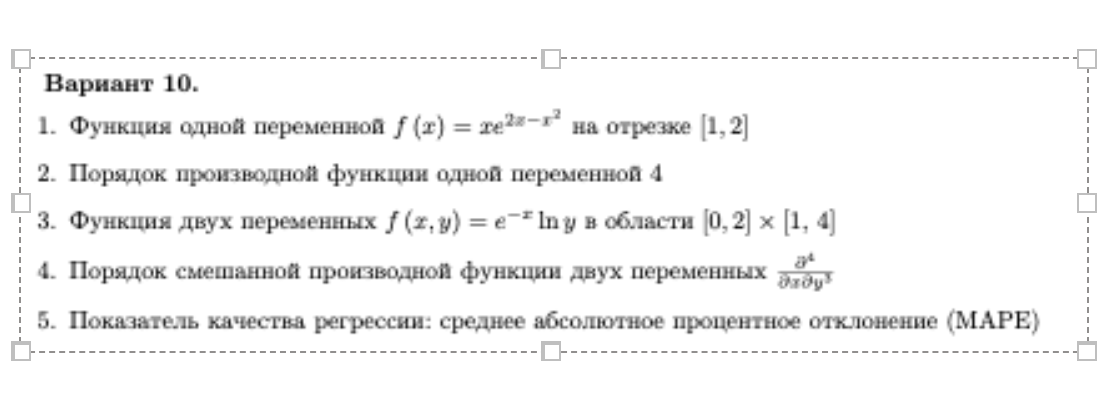

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1.    Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

2.    Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

3.    Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

4.    Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

5.    Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

6.    Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

7.    Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

8.    Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math. 

9.    Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

# __Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции. xe^(2x-x^2) [1,2]__

In [179]:
import tensorflow as tf
import numpy as np
import random
x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  f = f(x)

f

<tf.Tensor: shape=(1, 102), dtype=float32, numpy=
array([[2.7182817, 2.7231827, 2.746177 , 2.774183 , 2.7818046, 2.866705 ,
        2.878999 , 2.8886871, 2.949872 , 2.9628925, 3.059502 , 3.0767608,
        3.1053836, 3.1068375, 3.142675 , 3.156945 , 3.1600955, 3.1636384,
        3.186646 , 3.1876452, 3.1878395, 3.1925142, 3.2065034, 3.206546 ,
        3.2093215, 3.209674 , 3.2125583, 3.2372346, 3.2374341, 3.2386036,
        3.2389634, 3.2404163, 3.240809 , 3.244747 , 3.2453876, 3.245651 ,
        3.2476022, 3.2475827, 3.2475367, 3.2463977, 3.245709 , 3.24103  ,
        3.229262 , 3.2250648, 3.2161913, 3.202729 , 3.1841614, 3.181574 ,
        3.1615505, 3.1468034, 3.1346545, 3.1344862, 3.1159017, 3.0846975,
        3.0624917, 3.0085025, 3.0023668, 2.9969687, 2.9854722, 2.9830446,
        2.9573328, 2.9265468, 2.887153 , 2.881725 , 2.8772619, 2.866695 ,
        2.836947 , 2.8306334, 2.824621 , 2.7948422, 2.7747738, 2.7492142,
        2.736104 , 2.6996603, 2.6509578, 2.606536 , 2.5992346,

In [180]:
maxx=tf.reduce_max(f)
maxx

<tf.Tensor: shape=(), dtype=float32, numpy=3.2476022>

In [181]:
minn=tf.reduce_min(f)
minn

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# __Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.__



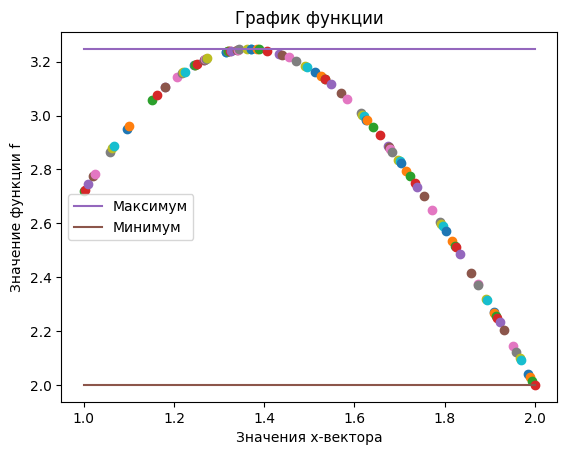

In [182]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, f)
ax.plot(x.numpy(), f.numpy(), 'o')
# Добавляем прямые, соответствующие максимальному и минимальному значению функции
ax.plot([1, 2], [maxx, maxx], label='Максимум')
ax.plot([1, 2], [minn, minn], label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('Значения x-вектора')
ax.set_ylabel('Значение функции f')
ax.set_title('График функции')
ax.legend()
plt.show()

# __Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.__

порядок - 4

In [183]:
x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape1:
  tape1.watch(x)
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    with tf.GradientTape(persistent=True) as tape3:
      tape3.watch(x)
      with tf.GradientTape(persistent=True) as tape4:  
        tape4.watch(x)
        f = f(x)
      dydx = tape4.gradient(f, x)    
    d2ydx2 =tape3.gradient(dydx, x)  
  d3ydx3=tape2.gradient(d2ydx2, x) 
d4ydx4 =tape1.gradient(d3ydx3, x)  

print('dy/dx =', dydx)
print('d2y/dx2 =', d2ydx2)
print('d3y/dx3 =', d3ydx3)
print('d4y/dx4 =', d4ydx4)


dy/dx = tf.Tensor(
[[ 2.71828175e+00  2.70255065e+00  2.67131090e+00  2.66672635e+00
   2.59827209e+00  2.50569296e+00  2.46826077e+00  2.39902616e+00
   2.23096848e+00  2.20202446e+00  2.18934155e+00  2.17770243e+00
   2.15788102e+00  2.06573486e+00  1.96986103e+00  1.86244011e+00
   1.76984406e+00  1.75216675e+00  1.63010645e+00  1.62378693e+00
   1.57023382e+00  1.51421118e+00  1.37382555e+00  1.35814810e+00
   1.24062967e+00  9.79778290e-01  8.70536804e-01  8.27668190e-01
   8.10695171e-01  7.69124508e-01  6.69467449e-01  5.71016312e-01
   5.28904438e-01  5.16969204e-01  5.10545731e-01  4.49086189e-01
   3.69019508e-01  3.36000443e-01  1.12769127e-01 -1.21593475e-04
  -9.77859497e-02 -1.49307728e-01 -1.93232059e-01 -5.26002407e-01
  -6.31994724e-01 -6.67270660e-01 -6.68132305e-01 -6.94612980e-01
  -7.45152950e-01 -9.30687904e-01 -9.50689316e-01 -1.00213385e+00
  -1.01991224e+00 -1.03114033e+00 -1.07221985e+00 -1.09338665e+00
  -1.12627649e+00 -1.27167463e+00 -1.30708885e+00 -1.3734

похоже на правду, я проверила вручную

Text(0.5, 1.0, 'График функции')

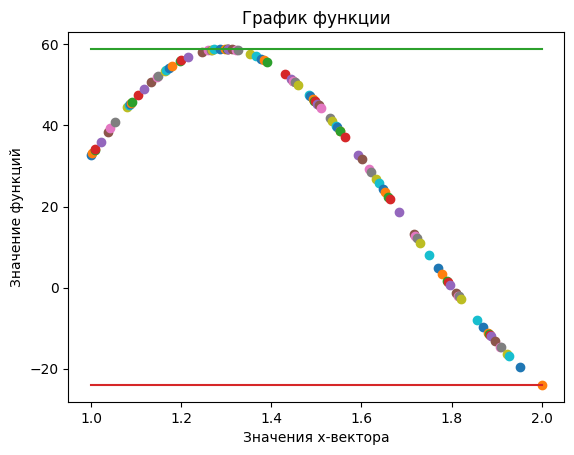

In [184]:
maxx = tf.reduce_max(d4ydx4)
minn = tf.reduce_min(d4ydx4)

fig, ax = plt.subplots()

line_down = ax.plot(x, d4ydx4.numpy(), 'o', label='Производная 4 степени')


# Добавляем прямые, соответствующие максимальному и минимальному значению функции
ax.plot([1, 2], [maxx, maxx], label='Максимум')
ax.plot([1, 2], [minn, minn], label='Минимум')

# Добавляем подписи осей, заголовок и легенду
ax.set_xlabel('Значения x-вектора')
ax.set_ylabel('Значение функций')
ax.set_title('График функции')
#ax.legend()

In [185]:
del tape

# __Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.  [0,2][1,4]__

In [186]:
x=np.random.uniform(0, 2, [1, 70])
y=np.random.uniform(1, 4, [1, 70])
x=np.append(x,[0,2])
y=np.append(y,[1,4])
x.sort()
y.sort()
x = tf.constant([x], dtype=tf.float32)
y = tf.constant([y], dtype=tf.float32)
x, y = tf.meshgrid(x, y)
@tf.function
def f(x,y):
    return tf.exp(-x)*tf.math.log(y)


In [187]:
tf.reduce_max(f(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3862944>

In [188]:
tf.reduce_min(f(x,y))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

# __Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.__

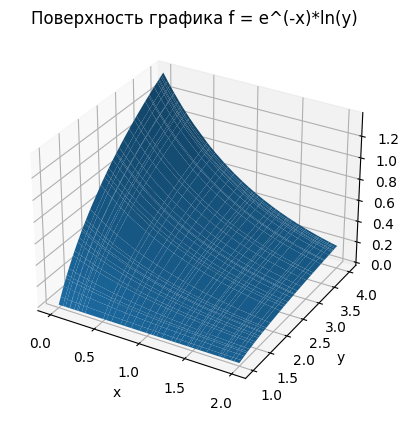

In [189]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f(x,y))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность графика f = e^(-x)*ln(y)')
plt.show()

# __Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.__
d4/dxdy3

In [190]:
with tf.GradientTape(persistent=True) as tape4:
  tape4.watch(y)
  with tf.GradientTape(persistent=True) as tape3:
    tape3.watch(y)
    with tf.GradientTape(persistent=True) as tape2:
      tape2.watch(y)
      with tf.GradientTape(persistent=True) as tape1:
        tape1.watch(x)
        f=f(x,y)
      dfdx = tape1.gradient(f, x)
    dfdxdy = tape2.gradient(dfdx, y)
  dfdxdy2 = tape3.gradient(dfdxdy, y)
dfdxdy3 = tape4.gradient(dfdxdy2, y)
dfdxdy3

<tf.Tensor: shape=(72, 72), dtype=float32, numpy=
array([[-1.9999996 , -1.983915  , -1.9022328 , ..., -0.29012698,
        -0.2867844 , -0.2706705 ],
       [-1.986929  , -1.9709495 , -1.8898011 , ..., -0.28823093,
        -0.2849102 , -0.2689016 ],
       [-1.6850998 , -1.6715478 , -1.6027263 , ..., -0.24444653,
        -0.24163024, -0.22805348],
       ...,
       [-0.0331453 , -0.03287873, -0.03152504, ..., -0.00480817,
        -0.00475278, -0.00448573],
       [-0.03237931, -0.03211891, -0.0307965 , ..., -0.00469706,
        -0.00464294, -0.00438206],
       [-0.03124999, -0.03099867, -0.02972239, ..., -0.00453323,
        -0.00448101, -0.00422923]], dtype=float32)>

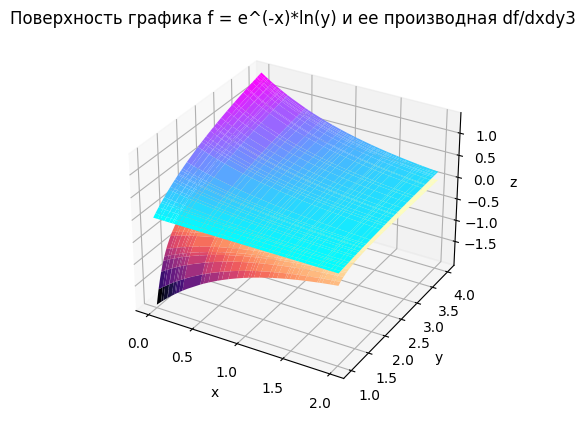

In [191]:

# Plot the surfaces
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f.numpy(), cmap='cool')
ax.plot_surface(x, y, dfdxdy3.numpy(), cmap='magma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность графика f = e^(-x)*ln(y) и ее производная df/dxdy3')
plt.show()

In [192]:
del tape1
del tape2
del tape3
del tape4

# __Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.__
mape

In [193]:

x=np.random.uniform(1, 2, [1, 100])
x=np.append(x,[1,2])
x.sort()
x_train = tf.constant([x], dtype=tf.float32)
@tf.function
def f(x):
    return x * (tf.exp(2 * x - tf.pow(x, 2)))
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x_train)
  y_train = f(x_train)


In [194]:
def mape(y_test, pred):
   
    mape = tf.reduce_mean(tf.abs((y_test - pred) / y_test))
    return mape

In [195]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = mape(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [196]:
class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(tf.constant(1.0))
    self.b = tf.Variable(tf.constant(1.0))

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [197]:
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_train, y_train, learning_rate=0.00999)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=1.00 b=1.00, потери=0.27502
Эпоха  1: w=1.00 b=1.00, потери=0.27177
Эпоха  2: w=1.01 b=1.01, потери=0.26857
Эпоха  3: w=1.01 b=1.01, потери=0.26544
Эпоха  4: w=1.02 b=1.01, потери=0.26250
Эпоха  5: w=1.02 b=1.02, потери=0.25960
Эпоха  6: w=1.03 b=1.02, потери=0.25674
Эпоха  7: w=1.03 b=1.02, потери=0.25399
Эпоха  8: w=1.03 b=1.03, потери=0.25136
Эпоха  9: w=1.04 b=1.03, потери=0.24876
Эпоха 10: w=1.04 b=1.03, потери=0.24620
Эпоха 11: w=1.05 b=1.04, потери=0.24369
Эпоха 12: w=1.05 b=1.04, потери=0.24133
Эпоха 13: w=1.05 b=1.04, потери=0.23901
Эпоха 14: w=1.06 b=1.05, потери=0.23671
Эпоха 15: w=1.06 b=1.05, потери=0.23444
Эпоха 16: w=1.06 b=1.05, потери=0.23220
Эпоха 17: w=1.07 b=1.06, потери=0.22999
Эпоха 18: w=1.07 b=1.06, потери=0.22787
Эпоха 19: w=1.07 b=1.06, потери=0.22595
Эпоха 20: w=1.08 b=1.06, потери=0.22406
Эпоха 21: w=1.08 b=1.07, потери=0.22219
Эпоха 22: w=1.08 b=1.07, потери=0.22044
Эпоха 23: w=1.09 b=1.07, потери=0.21872
Эпоха 24: w=1.09 b=1.08, потери=0.21702


# __Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.__

In [198]:
def plot_learning_curve(losses):
    plt.plot(losses)
    plt.title('mape на каждой эпохе')
    plt.xlabel('Эпоха')
    plt.ylabel('mape')
    plt.show()

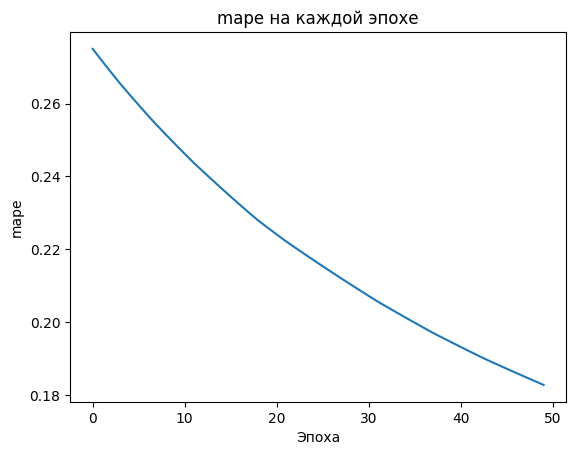

In [199]:
plot_learning_curve(losses)

# __Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.__

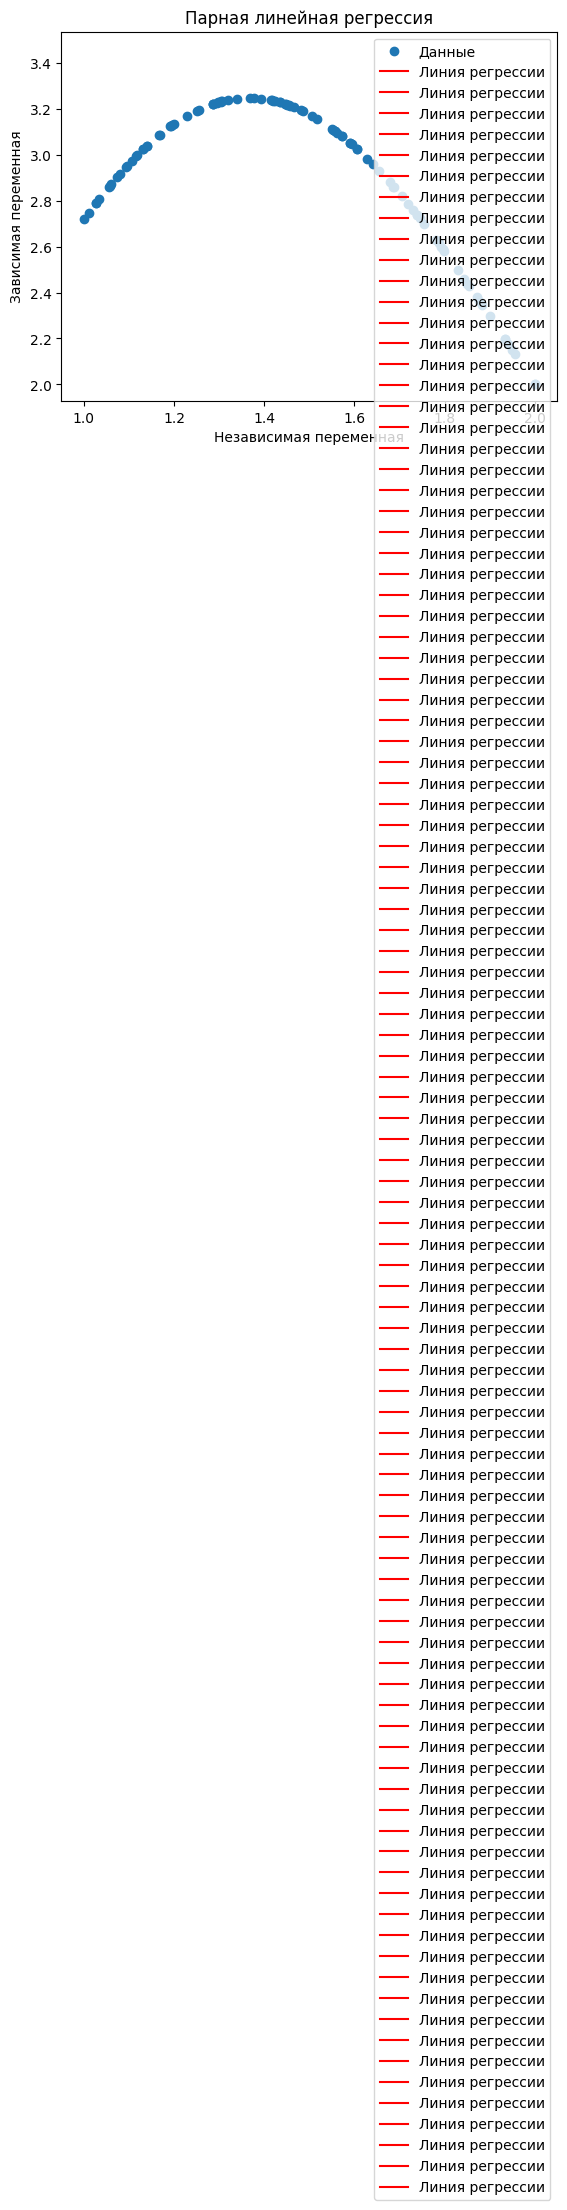

In [200]:
y_pred = model(x_train)
plt.scatter(x_train, y_train, label='Данные')
plt.plot(x_train, y_pred, label='Линия регрессии', color='r') #scatter рисует
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('Парная линейная регрессия')
plt.legend()
plt.show()